In [1]:
import pandas as pd
import numpy as np

In [2]:
food_consumption = pd.read_csv("food_consumption (1).csv")

In [3]:
food_consumption.head()

Unnamed: 0    country food_category  consumption  co2_emission
0           1  Argentina          pork        10.51         37.20
1           2  Argentina       poultry        38.66         41.53
2           3  Argentina          beef        55.48       1712.00
3           4  Argentina     lamb_goat         1.56         54.63
4           5  Argentina          fish         4.36          6.96

In [8]:
food_consumption.drop('Unnamed: 0' , axis=1 , inplace=True)

In [9]:
food_consumption.head()

country food_category  consumption  co2_emission
0  Argentina          pork        10.51         37.20
1  Argentina       poultry        38.66         41.53
2  Argentina          beef        55.48       1712.00
3  Argentina     lamb_goat         1.56         54.63
4  Argentina          fish         4.36          6.96

In [12]:
# Filter for Belgium
be_consumption = food_consumption[food_consumption['country'] =='Belgium']
print("bel mean" ,be_consumption.mean())
print("bel median" ,be_consumption.median())

bel mean consumption      42.132727
co2_emission    100.190000
dtype: float64
bel median consumption     12.59
co2_emission    21.34
dtype: float64


C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16564\3676134512.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("bel mean" ,be_consumption.mean())
C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16564\3676134512.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print("bel median" ,be_consumption.median())


In [13]:
# Filter for USA
usa_consumption = food_consumption[food_consumption['country'] =='USA']

# Calculate mean and median consumption in USA
print(usa_consumption.mean())
print(usa_consumption.median())

consumption      44.65
co2_emission    156.26
dtype: float64
consumption     14.58
co2_emission    15.34
dtype: float64


C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16564\3063549155.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(usa_consumption.mean())
C:\Users\Abdelrahman\AppData\Local\Temp\ipykernel_16564\3063549155.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(usa_consumption.median())


In [14]:
# Subset for Belgium and USA only
be_and_usa = food_consumption[(food_consumption['country'] == "Belgium") | (food_consumption['country'] == 'USA')]

In [17]:
print(be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median]))

              mean  median
country                   
Belgium  42.132727   12.59
USA      44.650000   14.58


In [20]:
food_consumption.columns

Index(['country', 'food_category', 'consumption', 'co2_emission'], dtype='object')

In [23]:
import matplotlib.pyplot as plt

rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']
rice_consumption.head()

country food_category  consumption  co2_emission
8     Argentina          rice         8.77         11.22
19    Australia          rice        11.03         14.12
30      Albania          rice         7.78          9.96
41      Iceland          rice         3.89          4.98
52  New Zealand          rice         9.16         11.72

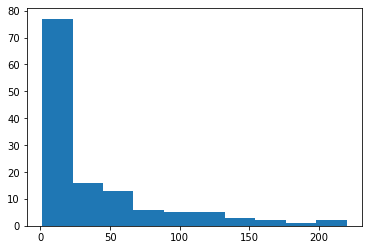

In [28]:
plt.hist(rice_consumption['co2_emission'])
plt.show()

In [30]:
rice_consumption = food_consumption[food_consumption['food_category'] == 'rice']
print(rice_consumption['co2_emission'].agg([np.mean, np.median]))

mean      37.591615
median    15.200000
Name: co2_emission, dtype: float64


In [31]:
food_consumption.head()

country food_category  consumption  co2_emission
0  Argentina          pork        10.51         37.20
1  Argentina       poultry        38.66         41.53
2  Argentina          beef        55.48       1712.00
3  Argentina     lamb_goat         1.56         54.63
4  Argentina          fish         4.36          6.96

In [54]:
np.quantile(food_consumption['co2_emission'] , np.linspace(0,1,6))

array([   0.   ,    3.54 ,   11.026,   25.59 ,   99.978, 1712.   ])

In [33]:
np.quantile(food_consumption['co2_emission'] , [0,.25, .5 , .75 , 1])

array([   0.    ,    5.21  ,   16.53  ,   62.5975, 1712.    ])

In [38]:
np.linspace(0,1,5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [35]:
np.median(food_consumption['co2_emission'])

16.53

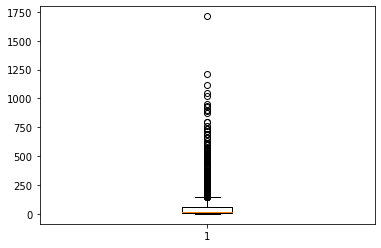

In [36]:
plt.boxplot(food_consumption['co2_emission'])
plt.show()

In [40]:
62.5975 - 5.21

57.387499999999996

In [39]:
from scipy.stats import iqr
iqr(food_consumption['co2_emission'])

57.3875

In [41]:
iqr = iqr(food_consumption['co2_emission'])
lower = np.quantile(food_consumption['co2_emission'] , .25) - 1.5 * iqr
upper = np.quantile(food_consumption['co2_emission'] , .75) + 1.5 * iqr

In [47]:
outliers = food_consumption[(food_consumption['co2_emission'] < lower) | (food_consumption['co2_emission'] > upper)]
outliers

country food_category  consumption  co2_emission
2       Argentina          beef        55.48       1712.00
6       Argentina         dairy       195.08        277.87
13      Australia          beef        33.86       1044.85
14      Australia     lamb_goat         9.87        345.65
17      Australia         dairy       234.49        334.01
...           ...           ...          ...           ...
1295  Philippines          rice       119.44        152.85
1366     Cambodia          beef         4.85        149.66
1372     Cambodia          rice       159.10        203.60
1405    Indonesia          rice       134.62        172.27
1427   Bangladesh          rice       171.73        219.76

[208 rows x 4 columns]

In [48]:
outliers.count()

country          208
food_category    208
consumption      208
co2_emission     208
dtype: int64

In [53]:
outliers.count()

country          208
food_category    208
consumption      208
co2_emission     208
dtype: int64

In [ ]:
be_and_usa.groupby('country')['consumption'].agg([np.mean, np.median])

In [59]:
food_consumption.groupby('food_category')['co2_emission'].agg([np.var, np.std])

var         std
food_category                          
beef           88748.408132  297.906710
dairy          17671.891985  132.935669
eggs              21.371819    4.622966
fish             921.637349   30.358481
lamb_goat      16475.518363  128.356996
nuts              35.639652    5.969895
pork            3094.963537   55.632396
poultry          245.026801   15.653332
rice            2281.376243   47.763754
soybeans           0.879882    0.938020
wheat             71.023937    8.427570

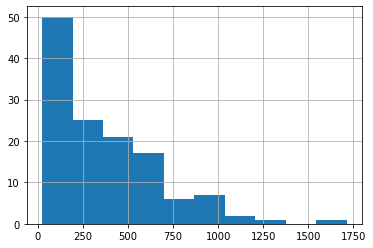

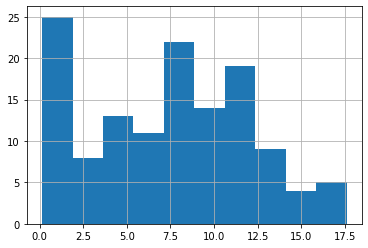

In [60]:

food_consumption[food_consumption['food_category'] == 'beef']['co2_emission'].hist()
# Show plot
plt.show()

# Create histogram of co2_emission for food_category 'eggs'
food_consumption[food_consumption['food_category'] == 'eggs']['co2_emission'].hist()
# Show plot
plt.show()

In [ ]:
#Calculate the total co2_emission per country 
#by grouping by country and taking the sum of co2_emission
#Store the resulting DataFrame as emissions_by_country.

In [63]:
emissions_by_country = food_consumption.groupby('country')['co2_emission'].agg(sum)
emissions_by_country

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [65]:
q1 = np.quantile(food_consumption['co2_emission'] , .25)
q3 = np.quantile(food_consumption['co2_emission'] , .75)
iqr = q3 - q1
iqr

57.3875

In [66]:
q1 = np.quantile(emissions_by_country , .25)
q3 = np.quantile(emissions_by_country , .75)
iqr = q3 - q1
iqr

664.4925000000001

In [68]:
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

In [72]:
emissions_by_country

country
Albania      1777.85
Algeria       707.88
Angola        412.99
Argentina    2172.40
Armenia      1109.93
              ...   
Uruguay      1634.91
Venezuela    1104.10
Vietnam       641.51
Zambia        225.30
Zimbabwe      350.33
Name: co2_emission, Length: 130, dtype: float64

In [70]:
outliers = (emissions_by_country < lower) | (emissions_by_country > upper)

In [71]:
outliers

country
Albania      False
Algeria      False
Angola       False
Argentina     True
Armenia      False
             ...  
Uruguay      False
Venezuela    False
Vietnam      False
Zambia       False
Zimbabwe     False
Name: co2_emission, Length: 130, dtype: bool

In [75]:
outliers = emissions_by_country[(emissions_by_country < lower) | (emissions_by_country > upper)]

In [76]:
outliers

country
Argentina    2172.4
Name: co2_emission, dtype: float64